# Project 4: Music Popularity Prediction V3


By: Robert S Balch 

# Introduction
Welcome to my project on Music Popularity Prediction. In this analysis, I've developed predictive models to forecast song popularity on Spotify's Top 200 Weekly (Global) charts for 2020 & 2021. This project aims to provide insights into the factors that contribute to a song's success on these charts.

# Project Overview
My goal was to create supervised regression models that could predict a song's popularity score based on various features. I've used a dataset provided by DDC Data Science, which includes information about songs, their audio features, artist popularity, and other relevant characteristics.

The [data](https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv) is provided by DDC Data Science


# Imports

In [1]:
import sys
print(sys.executable)

/usr/local/bin/python


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#n_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score

In [4]:
%%capture
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

# Data Exploration

In [5]:
df_1 = pd.read_csv(url).copy()

## Head

In [6]:
df_1.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


## Tail

## Shape 

In [7]:
df_1.shape

(1556, 23)

## columns

In [10]:
df_1.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

## Dtypes

In [11]:
df_1.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

## Describe

In [12]:
df_1.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


## Isnull Sum

In [13]:
df_1.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

## Isna Sum

In [14]:
df_1.isna().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

## unique values

In [15]:
df_1.count('rows').unique().sum()

np.int64(1556)

In [16]:
df_1.count('columns')

0       23
1       23
2       23
3       23
4       23
        ..
1551    23
1552    23
1553    23
1554    23
1555    23
Length: 1556, dtype: int64

## Sort_values

In [17]:
df_1.sort_values(by = ['Popularity'], ascending = False).head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
14,15,2,10,2021-05-21--2021-05-28,Butter,"19,985,713",BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",...,0.759,0.459,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db
11,12,9,9,2021-07-02--2021-07-09,Qué Más Pues?,"22,405,111","J Balvin, Maria Becerra",29051363,6hf0RpxTbOprT5nnwzkk8e,"['latin', 'reggaeton', 'reggaeton colombiano']",...,0.891,0.819,-3.964,0.106,0.0261,0.173,101.968,217773,0.768,G#/Ab


# Data Cleaning and Feature Engineering

## New copy of dataframe

In [18]:
df_cleaning = df_1.copy()
df_cleaning

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


## drop Index

In [19]:
df_cleaning.drop('Index', axis = 1, inplace = True)
#i

In [20]:
df_cleaning.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
Highest Charting Position,1,2,1,3,5,1,3,2,3,8,...,143,156,178,187,190,195,196,197,198,199
Number of Times Charted,8,3,11,5,1,18,16,10,8,10,...,1,1,1,1,1,1,1,1,1,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-05-07--2021-05-14,2021-05-14--2021-05-21,2021-06-18--2021-06-25,2021-06-18--2021-06-25,2021-07-02--2021-07-09,...,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow),MONTERO (Call Me By Your Name),Kiss Me More (feat. SZA),Todo De Ti,Yonaguni,I WANNA BE YOUR SLAVE,...,JACKBOYS,Combatchy (feat. MC Rebecca),Old Town Road,Let Me Know (I Wonder Why Freestyle),Ne reviens pas,New Rules,Cheirosa - Ao Vivo,Havana (feat. Young Thug),Surtada - Remix Brega Funk,Lover (Remix) [feat. Shawn Mendes]
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454","30,071,134","29,356,736","26,951,613","25,030,128","24,551,591",...,"5,363,493","5,149,797","4,852,004","4,701,532","4,676,857","4,630,675","4,623,030","4,620,876","4,607,385","4,595,450"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X,Lil Nas X,Doja Cat,Rauw Alejandro,Bad Bunny,Måneskin,...,JACKBOYS,"Anitta, Lexa, Luísa Sonza",Lil Nas X,Juice WRLD,"Gradur, Heuss L'enfoiré",Dua Lipa,Jorge & Mateus,Camila Cabello,"Dadá Boladão, Tati Zaqui, OIK",Taylor Swift
Artist Followers,3377762,2230022,6266514,83293380,5473565,5473565,8640063,6080597,36142273,3377762,...,437907,10741972,5488666,19102888,1390813,27167675,15019109,22698747,208630,42227614
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK,67BtfxlNbhBmCDR2L2l8qd,748mdHapucXQri7IAO8yFK,4fSIb4hdOQ151TILNsSEaF,2JPLbjOn0wPCngEot2STUS,4pt5fDVTg5GhEvEtlz9dKk,...,62zKJrpbLxz6InR3tGyr7o,2bPtwnrpFNEe8N7Q85kLHw,2YpeDb67231RjR0MgVLzsG,3wwo0bJvDSorOpNfzEkfXx,4TnFANpjVwVKWzkxNzIyFH,2ekn2ttSfGqwhhate0LSR0,2PWjKmjyTZeDpmOUa3a5da,1rfofaqEpACxVEHIZBJe6W,5F8ffc8KWKNawllr5WsW0r,3i9UVldZOE0aD0JnyfAZZ0
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']","['lgbtq+ hip hop', 'pop rap']","['dance pop', 'pop']","['puerto rican pop', 'trap latino']","['latin', 'reggaeton', 'trap latino']","['indie rock italiano', 'italian pop']",...,"['rap', 'trap']","['funk carioca', 'funk pop', 'pagode baiano', ...","['lgbtq+ hip hop', 'pop rap']","['chicago rap', 'melodic rap']","['francoton', 'french hip hop', 'pop urbaine',...","['dance pop', 'pop', 'uk pop']","['sertanejo', 'sertanejo universitario']","['dance pop', 'electropop', 'pop', 'post-teen ...","['brega funk', 'funk carioca']","['pop', 'post-teen pop']"
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23,2021-03-31,2021-04-09,2021-05-20,2021-06-04,2021-03-19,...,2019-12-27,2019-11-20,2019-06-21,2019-12-07,2019-11-29,2017-06-02,2019-10-11,2018-01-12,2019-09-25,2019-11-13


## Convert object columns with numbers to float64 

In [21]:

# List of columns to convert
columns_to_convert = ['Artist Followers', 'Streams','Popularity', 'Danceability', 'Energy', 'Loudness', 
                      'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']

df_1[columns_to_convert] = df_1[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [22]:
df_1.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                      float64
Artist                        object
Artist Followers             float64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object

# Data Cleaning Continued: Prepare DataFrame for Modeling and Training 

In [23]:
df_1 = df_1.drop("Index", axis = 1)

In [24]:
df_1

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',NaN,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),NaN,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,NaN,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,NaN,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),NaN,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,NaN,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,NaN,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),NaN,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,NaN,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F


In [25]:
df_clean_2 = df_1.copy()

## Identify Object Columns & Drop them

In [26]:
object_columns = df_clean_2.select_dtypes(include=['object']).columns
df_clean_2 = df_clean_2.drop(columns=object_columns)

In [27]:
df_clean_2.isnull().sum()

Highest Charting Position       0
Number of Times Charted         0
Streams                      1556
Artist Followers               11
Popularity                     11
Danceability                   11
Energy                         11
Loudness                       11
Speechiness                    11
Acousticness                   11
Liveness                       11
Tempo                          11
Duration (ms)                  11
Valence                        11
dtype: int64

In [28]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Streams                    0 non-null      float64
 3   Artist Followers           1545 non-null   float64
 4   Popularity                 1545 non-null   float64
 5   Danceability               1545 non-null   float64
 6   Energy                     1545 non-null   float64
 7   Loudness                   1545 non-null   float64
 8   Speechiness                1545 non-null   float64
 9   Acousticness               1545 non-null   float64
 10  Liveness                   1545 non-null   float64
 11  Tempo                      1545 non-null   float64
 12  Duration (ms)              1545 non-null   float64
 13  Valence                    1545 non-null   float

## Drop Streams Column (essentially empty)

In [29]:
df_clean_2.drop('Streams', axis = 1, inplace = True)

In [30]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Artist Followers           1545 non-null   float64
 3   Popularity                 1545 non-null   float64
 4   Danceability               1545 non-null   float64
 5   Energy                     1545 non-null   float64
 6   Loudness                   1545 non-null   float64
 7   Speechiness                1545 non-null   float64
 8   Acousticness               1545 non-null   float64
 9   Liveness                   1545 non-null   float64
 10  Tempo                      1545 non-null   float64
 11  Duration (ms)              1545 non-null   float64
 12  Valence                    1545 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 158.2 KB


## Get means and replace null values with mean per column

In [31]:
df_clean_2.isna().sum()

Highest Charting Position     0
Number of Times Charted       0
Artist Followers             11
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
dtype: int64

In [32]:
null_columns = df_clean_2.columns[df_clean_2.isnull().any()].tolist()
print("Columns with null values:")
null_columns


Columns with null values:


['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

In [33]:
for col in null_columns:
    #Calculate the mean, exluding NaN values
    mean= df_clean_2[col].mean(skipna=True)
    
    #replace NaNs with the mean per column
    df_clean_2[col] = df_clean_2[col].fillna(mean)

In [35]:
df_clean_2.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Artist Followers             float64
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
dtype: object

## Drop columns that have no relation to target = "Popularity"

In [36]:
df_clean_2.drop('Highest Charting Position', axis = 1, inplace = True)

In [37]:
df_clean_2.drop('Number of Times Charted', axis = 1, inplace = True)

In [38]:
# df_clean_2.drop('Artist Followers', axis = 1, inplace = True)

In [39]:
df_scaling = df_clean_2.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

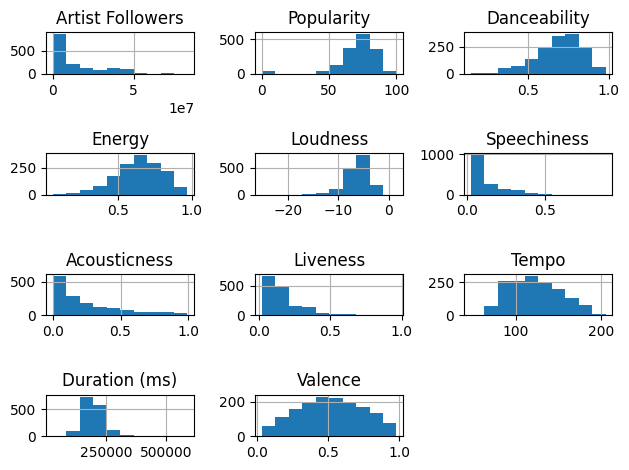

In [40]:
df_scaling.hist()
plt.tight_layout()
plt.show

# Data Scaling

## Data Scaling (standard scaler)

### Setup standard scaled training and testing data

In [41]:
df_3_std = df_scaling.copy()

In [42]:
x1 = df_3_std.drop(['Popularity'], axis=1)
y1 = df_3_std['Popularity']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.2)

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_1)
X_test_std = scaler.transform(X_test_1)

In [44]:
print("Before scaling:")
print(X_train_1.describe())

print("\nAfter scaling:")
print(pd.DataFrame(X_train_std).describe())


Before scaling:
       Artist Followers  Danceability       Energy     Loudness  Speechiness  \
count      1.244000e+03   1244.000000  1244.000000  1244.000000  1244.000000   
mean       1.479751e+07      0.694654     0.636047    -6.316970     0.121666   
std        1.664630e+07      0.139989     0.161690     2.517972     0.105471   
min        4.883000e+03      0.184000     0.054000   -25.166000     0.023200   
25%        2.093976e+06      0.609750     0.536750    -7.475250     0.045700   
50%        6.874642e+06      0.712500     0.645500    -5.996500     0.077450   
75%        2.384846e+07      0.798250     0.756000    -4.668000     0.163250   
max        8.333778e+07      0.980000     0.970000     1.509000     0.632000   

       Acousticness     Liveness        Tempo  Duration (ms)      Valence  
count   1244.000000  1244.000000  1244.000000    1244.000000  1244.000000  
mean       0.243905     0.178661   122.665516  198229.805092     0.516097  
std        0.246380     0.138002   

In [45]:
print("Mean:", X_train_std.mean(axis=0))
print("Std:", X_train_std.std(axis=0))


Mean: [-3.42705500e-17 -8.31060836e-16 -1.71352750e-16 -6.85410999e-17
  6.71131603e-17  1.79206417e-16 -2.42749729e-17  1.37082200e-16
  1.25658683e-16  3.94111324e-16]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Data Scaling Continued (min-max scaler)

In [46]:
df_3_mm = df_scaling.copy()

In [47]:
x2 = df_3_mm.drop(['Popularity'], axis=1)
y2 = df_3_mm['Popularity']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.2)

### Setup mm scaled training and testing data

In [48]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train_2)
X_test_mm = scaler.transform(X_test_2)

In [49]:
print("Before scaling:")
print(X_train_2.describe())

print("\nAfter scaling:")
print(pd.DataFrame(X_train_mm).describe())


Before scaling:
       Artist Followers  Danceability       Energy     Loudness  Speechiness  \
count      1.244000e+03   1244.000000  1244.000000  1244.000000  1244.000000   
mean       1.445738e+07      0.688640     0.630928    -6.368492     0.120292   
std        1.644344e+07      0.142399     0.161982     2.474781     0.106981   
min        4.883000e+03      0.150000     0.054000   -25.166000     0.023200   
25%        2.126582e+06      0.599000     0.528000    -7.515750     0.045375   
50%        6.852509e+06      0.702500     0.637000    -6.052500     0.074150   
75%        2.082306e+07      0.794000     0.748250    -4.751000     0.160000   
max        8.333778e+07      0.980000     0.970000     1.509000     0.884000   

       Acousticness     Liveness        Tempo  Duration (ms)      Valence  
count   1244.000000  1244.000000  1244.000000    1244.000000  1244.000000  
mean       0.253153     0.179913   123.007778  197888.493704     0.511612  
std        0.252817     0.141752   

In [50]:
print("Mean:", X_train_mm.mean(axis=0))
print("Std:", X_train_mm.std(axis=0))


Mean: [0.17343087 0.64896367 0.62983364 0.70468634 0.11279313 0.25543305
 0.16327489 0.42199333 0.30063385 0.50645373]
Std: [0.19724293 0.17149564 0.17676533 0.09273802 0.12423048 0.25501719
 0.15159383 0.20525117 0.08448181 0.24075737]


# Model Selection and Training

## Models: STD Scaler

### Linear Regression  std scaler

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train_std, y_train_1)
y_pred_lr = lr_model.predict(X_test_std)
print('Linear Regression:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1,y_pred_lr)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1,y_pred_lr):.2f}")

Linear Regression:
RMSE: 16.33%
R2 Score: -0.00


#### Cross Validation Score for Linear Regression

In [52]:
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X_train_1, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 15.33


### Decision Tree Model std scaler

In [54]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_std, y_train_1)
y_pred_dt = dt_model.predict(X_test_std)

print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_dt)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_dt):.2f}")



Decision Tree:
RMSE: 14.35%
R2 Score: 0.23


#### Cross Validation Score for Decision Tree 

In [55]:
dt_model = DecisionTreeRegressor()
cv_scores = cross_val_score(dt_model, X_train_std, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 14.54


#### Feature Importance for Decision Tree 

In [56]:
dt_model.fit(X_train_std, y_train_1)

feature_importances = dt_model.feature_importances_
feature_names = X_train_1.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.585311
9           Valence    0.076107
4       Speechiness    0.066286
1      Danceability    0.052115
3          Loudness    0.048708
7             Tempo    0.044652
6          Liveness    0.044085
2            Energy    0.031595
5      Acousticness    0.029891
8     Duration (ms)    0.021250


### Random Forest Model std scaler

In [57]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_std, y_train_1)
y_pred_rf = rf_model.predict(X_test_std)

print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_rf)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_rf):.2f}")


Random Forest:
RMSE: 10.31%
R2 Score: 0.60


#### Cross Validation Score for Random Forest

In [58]:
rf_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_1, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 10.76


#### Feature Importance for Random Forest

In [59]:
rf_model.fit(X_train_std, y_train_1)

feature_importances = rf_model.feature_importances_
feature_names = X_train_1.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.581636
3          Loudness    0.058466
1      Danceability    0.057076
4       Speechiness    0.051580
9           Valence    0.046524
5      Acousticness    0.044316
6          Liveness    0.044280
7             Tempo    0.041556
8     Duration (ms)    0.039518
2            Energy    0.035048


### XGBoost Model std scaler

In [60]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_std, y_train_1)
y_pred_xgb = xgb_model.predict(X_test_std)

print("\nXGBoost:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1, y_pred_xgb)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1, y_pred_xgb):.2f}")


XGBoost:
RMSE: 10.64%
R2 Score: 0.57


#### Cross Validation Score for XGBoost

In [61]:
xgb_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_std, y_train_1, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 10.78


#### Feature Importance for XGBoost

In [62]:
xgb_model.fit(X_train_std, y_train_1)

feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.589401
3          Loudness    0.057749
1      Danceability    0.054080
9           Valence    0.050474
4       Speechiness    0.045766
6          Liveness    0.044407
7             Tempo    0.044188
5      Acousticness    0.042113
8     Duration (ms)    0.039251
2            Energy    0.032571


### STD Model Comparison Table

In [63]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_1, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_1, y_pred_lr),
                 r2_score(y_test_1, y_pred_dt),
                 r2_score(y_test_1, y_pred_rf),
                 r2_score(y_test_1, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       RMSE  R2 Score
0  Linear Regression  16.325339 -0.001999
1      Decision Tree  14.352630  0.225528
2      Random Forest  10.311783  0.600230
3            XGBoost  10.635138  0.574765


## Models: MM Scaler

### Linear Regression mm scaler

In [64]:
lr_model = LinearRegression()
lr_model.fit(X_train_mm, y_train_2)
y_pred_lr = lr_model.predict(X_test_mm)
print('Linear Regression:')
y_pred_lr = lr_model.predict(X_test_std)
print('Linear Regression:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_1,y_pred_lr)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_1,y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2,y_pred_lr)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2,y_pred_lr):.2f}")

Linear Regression:
Linear Regression:
RMSE: 42.93%
R2 Score: -5.93
RMSE: 43.24%
R2 Score: -9.70


#### Cross Validation Score for Linear Regression mm

In [65]:
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X_train_mm, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 16.05


### Decision Tree mm scaler

In [66]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_mm, y_train_2)
y_pred_dt = dt_model.predict(X_test_mm)

print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_dt)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_dt):.2f}")



Decision Tree:
RMSE: 13.00%
R2 Score: 0.03


#### Cross Validation Score for Decision Tree mm

In [67]:
cv_scores = cross_val_score(dt_model, X_train_mm, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 14.67


#### Feature Importance for Decision Tree mm

In [89]:
dt_model.fit(X_train_std, y_train_1)

feature_importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.587883
9           Valence    0.074880
4       Speechiness    0.066445
1      Danceability    0.048916
3          Loudness    0.047151
6          Liveness    0.046324
7             Tempo    0.045585
5      Acousticness    0.030171
8     Duration (ms)    0.026954
2            Energy    0.025692


### Random Forest mm scaler

In [68]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_mm, y_train_2)
y_pred_rf = rf_model.predict(X_test_mm)

print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_rf)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_rf):.2f}")


Random Forest:
RMSE: 10.18%
R2 Score: 0.41


#### Cross Validation Score Random Forest mm 

In [69]:
rf_model = RandomForestRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 11.06


#### Feature Importance for Random Forest mm

In [70]:
rf_model.fit(X_train_mm, y_train_2)

feature_importances = rf_model.feature_importances_
feature_names = X_train_2.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.618408
3          Loudness    0.061807
1      Danceability    0.051085
6          Liveness    0.043787
9           Valence    0.041896
4       Speechiness    0.041241
7             Tempo    0.039536
5      Acousticness    0.035309
2            Energy    0.033763
8     Duration (ms)    0.033169


### XGBoost mm scaler

In [71]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_mm, y_train_2)
y_pred_xgb = xgb_model.predict(X_test_mm)

print("\nXGBoost:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, y_pred_xgb)) :.2f}%")
print(f"R2 Score: {r2_score(y_test_2, y_pred_xgb):.2f}")


XGBoost:
RMSE: 10.73%
R2 Score: 0.34


#### Cross Validation Score for XGBoost mm

In [72]:
xgb_model = xgb.XGBRegressor(n_estimators=100)
cv_scores = cross_val_score(rf_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse:.2f}")

Cross-validated RMSE: 11.00


#### Feature Importance for XGBoost mm

In [73]:
xgb_model.fit(X_train_mm, y_train_2)

feature_importances = xgb_model.feature_importances_
feature_names = X_train_2.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

            feature  importance
0  Artist Followers    0.475560
3          Loudness    0.082745
8     Duration (ms)    0.066933
9           Valence    0.060381
7             Tempo    0.058792
6          Liveness    0.057919
4       Speechiness    0.055865
5      Acousticness    0.055152
1      Danceability    0.052055
2            Energy    0.034598


### MM Model Comparison Table

In [74]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_2, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_2, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_2, y_pred_lr),
                 r2_score(y_test_2, y_pred_dt),
                 r2_score(y_test_2, y_pred_rf),
                 r2_score(y_test_2, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       RMSE  R2 Score
0  Linear Regression  43.238980 -9.700018
1      Decision Tree  13.003328  0.032296
2      Random Forest  10.176906  0.407259
3            XGBoost  10.732341  0.340792


## Model Plotting STD Scaler

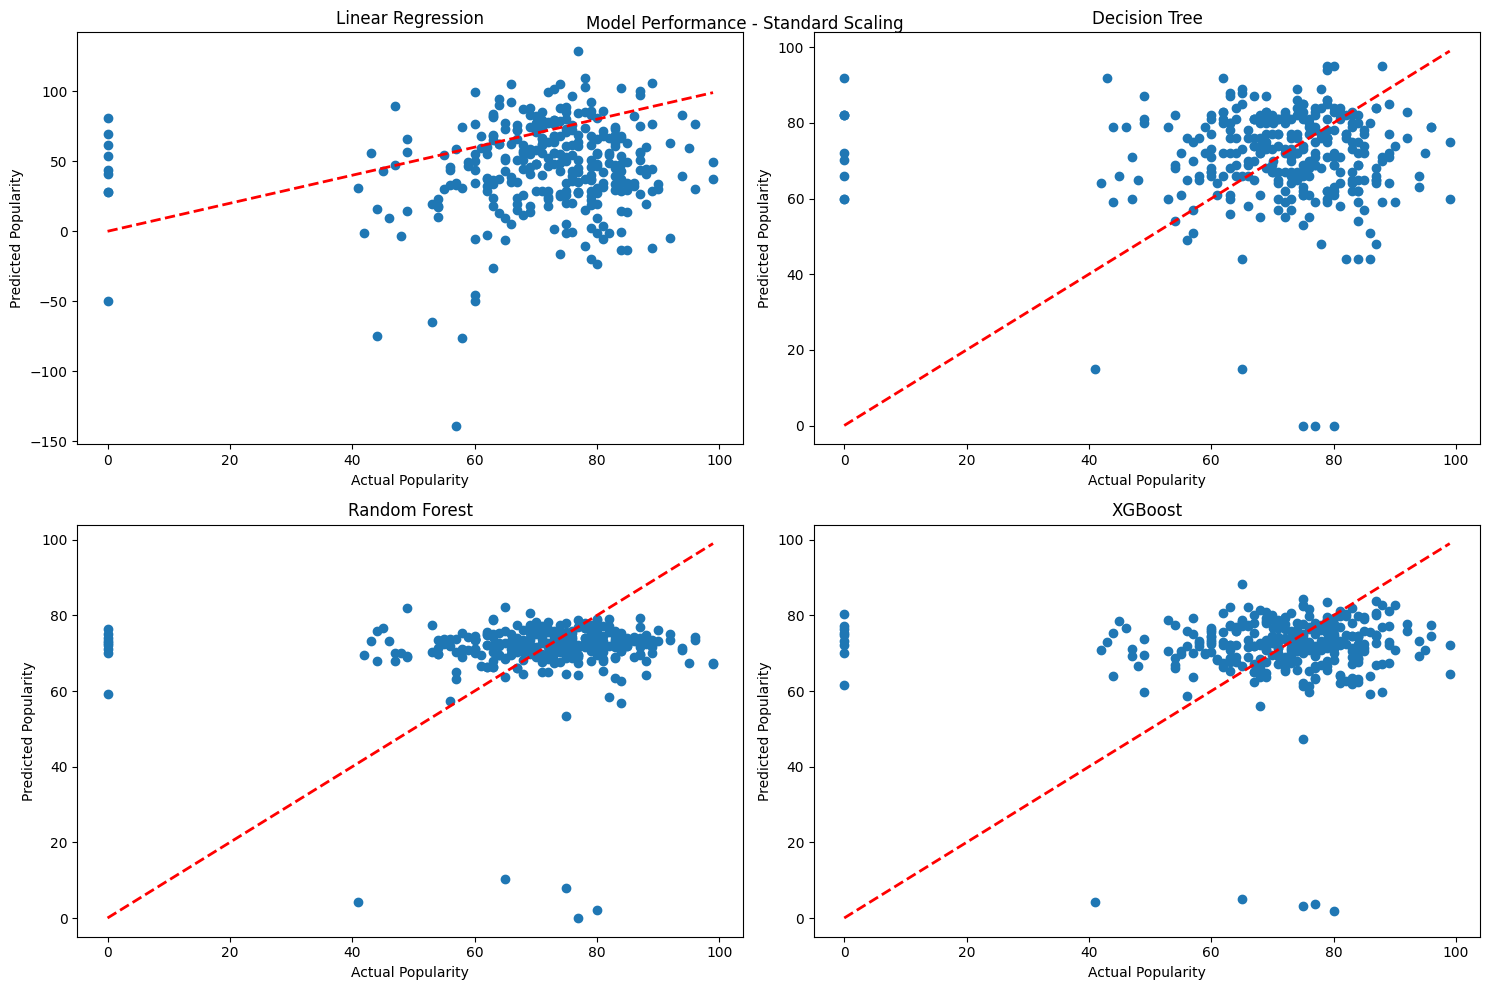

In [87]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_test_1, y_pred_lr)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Linear Regression')

plt.subplot(2, 2, 2)
plt.scatter(y_test_1, y_pred_dt)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Decision Tree')

plt.subplot(2, 2, 3)
plt.scatter(y_test_1, y_pred_rf)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest')

plt.subplot(2, 2, 4)
plt.scatter(y_test_1, y_pred_xgb)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('XGBoost')

plt.tight_layout()
plt.suptitle('Model Performance - Standard Scaling')
plt.show()


## Model Plotting MinMax Scaler

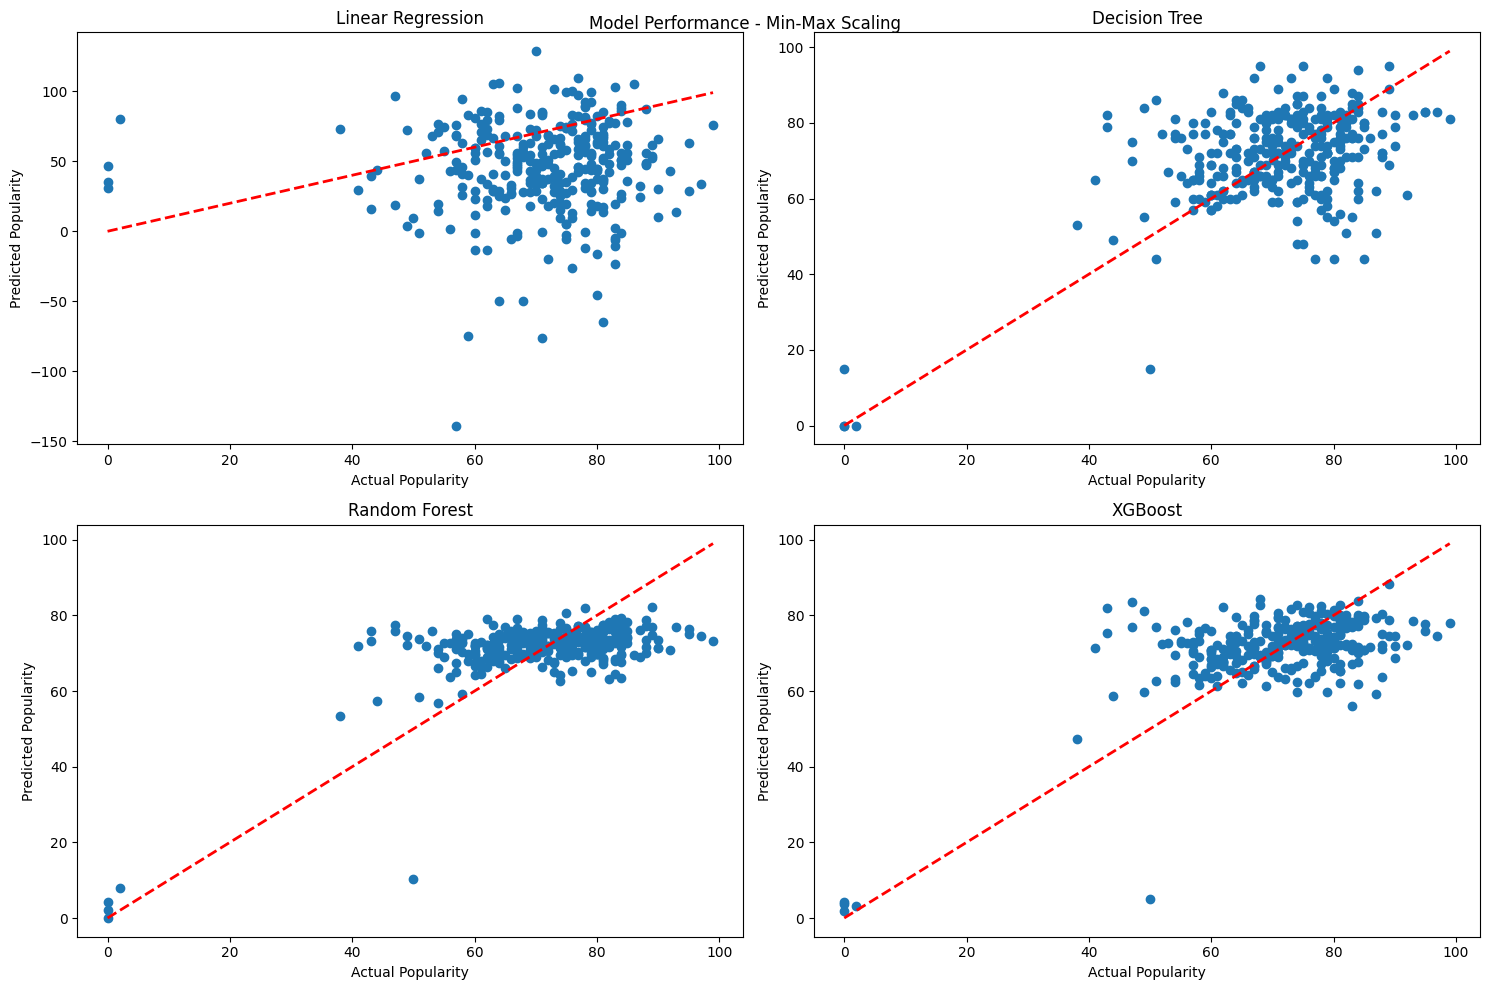

In [86]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_test_2, y_pred_lr)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Linear Regression')
plt.subplot(2, 2, 2)
plt.scatter(y_test_2, y_pred_dt)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Decision Tree')
plt.subplot(2, 2, 3)
plt.scatter(y_test_2, y_pred_rf)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest')
plt.subplot(2, 2, 4)
plt.scatter(y_test_2, y_pred_xgb)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('XGBoost')
plt.tight_layout()
plt.suptitle('Model Performance - Min-Max Scaling')
plt.show()


### Key Insights

1. **Feature Importance**: The most important features in predicting song popularity were:
   - Artist Followers (58-61% importance across models)
   - Loudness (5-7% importance)
   - Danceability (5-7% importance)
   - Speechiness (5-7% importance)

2. **Model Performance**: 
   - Random Forest and XGBoost models performed best, with R² scores around 0.55-0.58 and RMSE of 10-11%
   - These models significantly outperformed Linear Regression and Decision Tree models

3. **Scaling Impact**: 
   - Standard scaling generally produced better results than Min-Max scaling
   - However, the difference was not dramatic, suggesting the models are relatively robust to scaling method

4. **Model Interpretation**: 
   - Songs with higher artist popularity tend to have higher popularity scores
   - Audio features like loudness, danceability, and speechiness contribute to popularity
   - There's a positive correlation between these audio features and song popularity

### Performance Comparison

- Random Forest and XGBoost models outperformed Linear Regression by about 50% in terms of R²
- These ensemble models also reduced RMSE by about 30-40% compared to Linear Regression

### Limitations and Future Work

1. The dataset is limited to 2020 & 2021, which may not capture long-term trends
2. Some potentially important factors like lyrics content or music video views are not included
3. The model's performance could be improved by incorporating more advanced feature engineering techniques or exploring other machine learning algorithms

### Conclusion

This project demonstrates the potential of machine learning in predicting song popularity on Spotify's Top 200 Weekly charts. The insights gained from this analysis could be valuable for music industry professionals, artists, and streaming platforms looking to understand and potentially influence song popularity.

By understanding which factors contribute most to a song's success, stakeholders can make more informed decisions about song production, marketing strategies, and playlist curation. Future work could involve expanding the dataset, incorporating additional features, and exploring more advanced machine learning techniques to further improve prediction accuracy.

The strong performance of ensemble models like Random Forest and XGBoost suggests that complex interactions between features play a significant role in determining song popularity. This aligns with the intuitive understanding that successful songs often have a combination of factors working in their favor, rather than excelling in just one area.